<div id="toc_1" data-value="Inital code"></div>

# Lineplot Animation using Matplotlib, day 1
   In this tutorial we will do a basic lineplot animation using matplotlib.  
Lets get right into it.

### Import all the necessary modules.

In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib.animation as animation # for the animation

from IPython.display import HTML # To display the animation in jupter notebook

### Prepare some random data

In [1]:
n = 200 
X = np.arange(n) # Create x axis indices 0 ... n - 1
Y = np.random.rand(n)
Y[:10]

NameError: name 'np' is not defined

### Create the initial plot

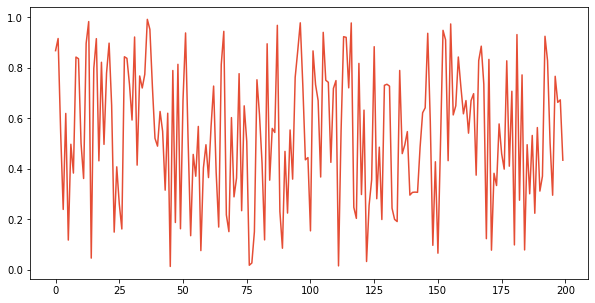

In [3]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(X, Y, c='#e54d35')
plt.show()

<div id="toc_2" data-value="Animating the data"></div>

### The logic behind the animations
   What we will do is basically create the plot multiple times by adding new data / points from 1 to n,  
   each of these plots will be a frame in our animation or video. 
   
   Now there's two way to do this.  
      1. Create the entire plot for each frame.  
      2. Only update the points.  
   
   We will go with the first option here.


<div id="toc_3" data-value="Method 1"></div>

## Method 1

### The update function 
   The update function will create a new plot from 0 to n - 1.  
   'i' determines the current index, i.e we will plot all the data upto 'i' for each frame and continue this 
   upto 1 -> n - 1.

In [5]:
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
def update(i):
    # clear the plot for each frame, so we dont have overlapped lines
    ax.clear()
    # plot upto 'i'
    ax.plot(X[:i], Y[:i], c='#e54d35')
    
    # Remove these lines if you don't want fixed x and y limit
    ax.set_xlim((xmin, xmax + 0.2))
    ax.set_ylim((ymin, ymax + 0.2))
    

In [6]:
ani = animation.FuncAnimation(fig,          # the canvas we will use for the animation
                              update,      # the update function
                              frames=n,     # total no of frames
                              interval=50, # the delay between each frame
                              blit=False
                             )

<div id="toc_4" data-value="Display the animation"></div>

### Display the animation in jupyter

In [7]:
HTML(ani.to_html5_video())

<div id="toc_5" data-value="Method 2"></div>

## Method 2
We will create the plot once and only update parts that are changing. For instance X and Y vectors will  
change for every plot and attributes such as line color or size will stay constant.  

Now what's the benefit doing this over Method 1 ?
Much less computationally expensive, so if you have a huge data use this method.  

list of line2D objects: [<matplotlib.lines.Line2D object at 0x000001C9452F7D60>]


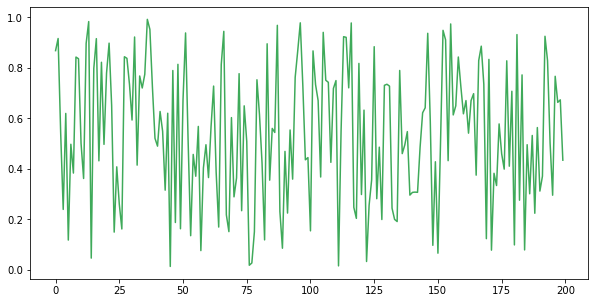

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
# The plot function returns a list of line2D objects
# Because we are going to modify the same plot
# The updates will be done on the line variable
line = ax.plot(X, Y, c='#3faa5a')
print('list of line2D objects:', line)
line = line[0]
plt.show()

In [10]:
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()

# Remove these lines if you don't want fixed x and y limit
ax.set_xlim((xmin, xmax + 0.2))
ax.set_ylim((ymin, ymax + 0.2))
    
def update(i):
    # Note how we don't clear the axis for each from, just change what we need to
    # Rather than redrawing the plot we only change the X and Y on our line 'line' and not the color
    # plot upto 'i'
    # use the set_data function
    line.set_data(X[:i], Y[:i])
    
    # we need to return 'line' as a list in this method
    return line,

In [11]:
ani = animation.FuncAnimation(fig,          # the canvas we will use for the animation
                              update,      # the update function
                              frames=n,     # total no of frames
                              interval=50, # the delay between each frame
                              blit=True, #IMPORTANT: blit is set true when you return some object from
                             )            #  the update function

<div id="toc_6" data-value="Method 2 Animated"></div>

In [12]:
HTML(ani.to_html5_video())